In [2]:
import pandas as pd
import numpy as np

#### 이상치 데이터 구하기

In [3]:
df = pd.read_csv('./archive/train.csv')

In [4]:
print(df.shape)
print(df.isnull().sum())

(891, 12)
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# IQR 구하기
Q1 = df['Fare'].quantile(.25)
Q3 = df['Fare'].quantile(.75)

IQR = Q3 - Q1
print(Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)

-26.724 65.6344


In [7]:
out1 = df[df['Fare'] < (Q1 - 1.5 * IQR)]
out2 = df[df['Fare'] > (Q3 + 1.5 * IQR)]

In [8]:
out2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S


In [9]:
sum(out2['Sex'] == 'female')

70

##### 소수점 나이
- 올림 : np.ceil()
- 내림 : np.floor()
- 버림 : np.trunc()

In [10]:
df = pd.read_csv('./archive/basic1.csv')
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [11]:
df = df[(df['age'] - np.floor(df['age'])) != 0]
df

,id,age,city,f1,f2,f3,f4,f5
6,id07,36.3,서울,60.0,1,NaN,ISFJ,9.796378
8,id09,3.3,서울,35.0,2,NaN,ESFJ,17.252986
21,id22,-6.3,부산,72.0,1,NaN,ENFP,52.667078
28,id29,-13.5,부산,47.0,2,NaN,ENTP,67.886373
46,id47,34.6,대구,75.0,1,NaN,ESTJ,90.496999
64,id65,26.5,경기,NaN,0,NaN,ISFP,91.297791
84,id85,83.6,경기,55.0,0,NaN,INFJ,80.138280
92,id93,21.8,경기,57.0,0,NaN,ISFP,73.586397


In [12]:
age_c = np.ceil(df['age']).mean()
age_f = np.floor(df['age']).mean()
age_t = np.trunc(df['age']).mean()

In [13]:
print(age_c, age_f, age_t)
print(age_c + age_f + age_t)

23.75 22.75 23.0
69.5


#### 결측치 처리

In [14]:
df = pd.read_csv('./archive/basic1.csv')
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [15]:
# 결측값 확인
df.isnull().sum()

id       0
age      0
city     0
f1      31
f2       0
f3      95
f4       0
f5       0
dtype: int64

In [16]:
df.shape

(100, 8)

In [17]:
df = df.drop(['f3'], axis=1)

In [18]:
df['city'].unique()

array(['서울', '부산', '대구', '경기'], dtype=object)

In [19]:
s_med = df[df['city']=='서울']['f1'].median()
b_med = df[df['city']=='부산']['f1'].median()
d_med = df[df['city']=='대구']['f1'].median()
k_med = df[df['city']=='경기']['f1'].median()

In [20]:
df['f1'] = df['f1'].fillna(df['city'].map({'서울':s_med, '대구':d_med, '부산':b_med, '경기':k_med}))

In [21]:
df.isnull().sum()

id      0
age     0
city    0
f1      0
f2      0
f4      0
f5      0
dtype: int64

In [22]:
df['f1'].mean()

65.52

#### 왜도(Skewness), 첨도(Kurtosis) 구하기 + 로그변환

In [25]:
df = pd.read_csv('./archive/house_prices.csv')

In [27]:
df['SalePrice'].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

<AxesSubplot:>

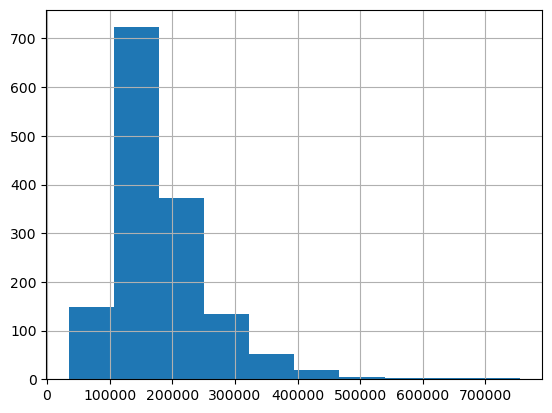

In [28]:
df['SalePrice'].hist()

In [29]:
s1 = df['SalePrice'].skew()
k1 = df['SalePrice'].kurt()
print('왜도 : ', s1)
print('첨도 : ', k1)

왜도 :  1.8828757597682129
첨도 :  6.536281860064529


<AxesSubplot:>

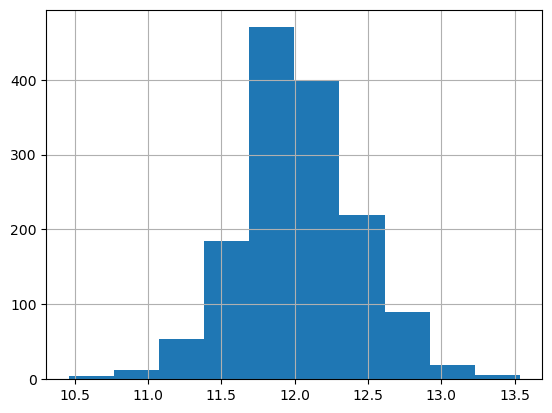

In [30]:
df['SalePrice'] = np.log1p(df['SalePrice'])
df['SalePrice'].hist()

In [31]:
s2 = df['SalePrice'].skew()
k2 = df['SalePrice'].kurt()
print('왜도 : ',s2)
print('첨도 : ',k2)

왜도 :  0.12134661989685333
첨도 :  0.809519155707878


In [32]:
print(round(s1+s2+k1+k2,2))

9.35


In [33]:
df = pd.read_csv('./archive/basic1.csv')
df

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869
...,...,...,...,...,...,...,...,...
95,id96,92.0,경기,53.0,1,NaN,ENTJ,52.667078
96,id97,100.0,경기,NaN,0,NaN,INFP,67.886373
97,id98,39.0,경기,58.0,2,NaN,INFP,98.429899
98,id99,1.0,경기,47.0,0,NaN,ESFJ,97.381034


In [34]:
enfj_std = df[df['f4']=='ENFJ']['f1'].std()
infp_std = df[df['f4']=='INFP']['f1'].std()

In [35]:
print(np.abs(enfj_std - infp_std))

5.859621525876811


#### 결측치 제거 및 그룹 합계
- 주어진 데이터 중 basic1.csv에서 'f1'컬럼 결측 데이터를 제거하고, 'city'와 'f2'을 기준으로 묶어 합계를 구하고, 'city가 경기이면서 f2가 0'인 조건에 만족하는 f1 값을 구하시오.

In [36]:
df = pd.read_csv('./archive/basic1.csv')
df

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869
...,...,...,...,...,...,...,...,...
95,id96,92.0,경기,53.0,1,NaN,ENTJ,52.667078
96,id97,100.0,경기,NaN,0,NaN,INFP,67.886373
97,id98,39.0,경기,58.0,2,NaN,INFP,98.429899
98,id99,1.0,경기,47.0,0,NaN,ESFJ,97.381034


In [40]:
df1 = df[~df['f1'].isnull()]

In [41]:
df2 = df1.groupby(['city', 'f2']).sum()
df2

age     f1          f5
city f2                          
경기   0   720.4  833.0  943.944823
     1   696.0  670.0  657.241212
     2   239.0  311.0  362.300060
대구   0   387.0  527.0  183.199568
     1   217.6  235.0  241.333824
     2   140.0  211.0   79.667919
부산   0   331.0  389.0  284.371097
     1   188.7  315.0  299.270973
     2   -13.5   47.0   67.886373
서울   0   145.0  278.0  218.528577
     1   315.3  534.0  438.485010
     2    68.3  207.0  126.661135

In [43]:
print(df2.iloc[0]['f1'])

833.0


#### 값 변경 및 2개 이상의 조건
- 'f4'컬럼의 값이 'ESFJ'인 데이터를 'ISFJ'로 대체하고, 'city'가 '경기'이면서 'f4'가 'ISFJ'인 데이터 중 'age'컬럼의 최대값을 출력하시오.

In [44]:
df = pd.read_csv('./archive/basic1.csv')
df[df['f4']=='ESFJ']

,id,age,city,f1,f2,f3,f4,f5
8,id09,3.3,서울,35.0,2,NaN,ESFJ,17.252986
12,id13,15.0,서울,68.0,0,NaN,ESFJ,83.685380
30,id31,86.0,부산,77.0,0,NaN,ESFJ,73.586397
58,id59,64.0,대구,NaN,1,NaN,ESFJ,20.129444
98,id99,1.0,경기,47.0,0,NaN,ESFJ,97.381034


In [45]:
df['f4'] = df['f4'].replace('ESFJ', 'ISFJ')

In [49]:
df[(df['f4']=='ISFJ')&(df['city']=='경기')]['age'].max()

90.0

#### 누적합 및 보간 (결측치 처리)
- 주어진 데이터 셋에서 'f2' 컬럼이 1인 조건에 해당하는 데이터의 'f1'컬럼 누적합을 계산한다. 이때 발생하는 누적합 결측치는 바로 뒤의 값을 채우고, 누적합의 평균값을 출력한다. (단, 결측치 바로 뒤의 값이 없으면 다음에 나오는 값을 채워넣는다)

##### Hint
- fillna()
    - bfill : 바로 뒤값으로 채워넣는 방법
    - pad : 이전값으로 채워넣는 방법

In [50]:
df = pd.read_csv('./archive/basic1.csv')

In [56]:
df2 = df[df['f2']==1]['f1'].cumsum()
df2

1       70.0
2      131.0
6      191.0
7      292.0
9      366.0
13     416.0
14     483.0
16       NaN
19     534.0
20       NaN
21     606.0
22     681.0
25     738.0
27     772.0
33       NaN
35     849.0
37       NaN
46     924.0
49    1002.0
51    1084.0
53       NaN
55       NaN
58       NaN
62    1170.0
65       NaN
66    1222.0
69    1318.0
72       NaN
77    1414.0
80    1464.0
82    1514.0
86       NaN
88    1580.0
91    1658.0
93       NaN
94    1701.0
95    1754.0
Name: f1, dtype: float64

In [57]:
df2 = df2.fillna(method='bfill')
df2

1       70.0
2      131.0
6      191.0
7      292.0
9      366.0
13     416.0
14     483.0
16     534.0
19     534.0
20     606.0
21     606.0
22     681.0
25     738.0
27     772.0
33     849.0
35     849.0
37     924.0
46     924.0
49    1002.0
51    1084.0
53    1170.0
55    1170.0
58    1170.0
62    1170.0
65    1222.0
66    1222.0
69    1318.0
72    1414.0
77    1414.0
80    1464.0
82    1514.0
86    1580.0
88    1580.0
91    1658.0
93    1701.0
94    1701.0
95    1754.0
Name: f1, dtype: float64

In [59]:
print(df2.mean())

980.3783783783783


### 빅데이터 분석기사 기출 4회 작업형1

In [14]:
df = pd.read_csv('./archive/basic1.csv')

In [18]:
q1 = df.age.quantile(.25)
q3 = df.age.quantile(.75)

In [19]:
iqr = int(abs(q3 - q1))

In [20]:
iqr

50

In [22]:
df = pd.read_csv('./archive/fb.csv')

In [26]:
df

,id,type,reactions,comments,shares,likes,loves,wows,hahas,sads,angrys
0,1,video,529,512,262,432,92,3,1,1,0
1,2,photo,150,0,0,150,0,0,0,0,0
2,3,video,227,236,57,204,21,1,1,0,0
3,4,photo,111,0,0,111,0,0,0,0,0
4,5,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,89,0,0,89,0,0,0,0,0
7046,7047,photo,16,0,0,14,1,0,1,0,0
7047,7048,photo,2,0,0,1,1,0,0,0,0
7048,7049,photo,351,12,22,349,2,0,0,0,0


In [30]:
len(df[((df.loves + df.wows)/(df.reactions) > 0.4) & ((df.loves + df.wows)/(df.reactions) < 0.5) & (df.type == 'video')])

90

In [31]:
df = pd.read_csv('./archive/nf.csv')

In [33]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [34]:
df.date_added = pd.to_datetime(df.date_added)

In [37]:
df.year = df.date_added.dt.year
df.month = df.date_added.dt.month

len(df[(df.country == 'United Kingdom') & (df.year == 2018) & (df.month == 1)])

C:\Users\USER\AppData\Local\Temp\ipykernel_10236\943576656.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.year = df.date_added.dt.year
C:\Users\USER\AppData\Local\Temp\ipykernel_10236\943576656.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.month = df.date_added.dt.month


6

### 빅데이터 분석기사 실기 3회 작업형1

작업형 1-1

In [38]:
import pandas as pd

In [47]:
df = pd.read_csv('./BDAC_3/t1-data2.csv', index_col='year')

In [48]:
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
year,,,,,,,,,,,,,,,,,,,,,
2022년,69,37,57,70,40,75,8,67,89,91,...,79,56,98,21,14,25,17,10,60,17
2023년,52,13,22,70,92,80,8,56,17,96,...,62,47,59,6,25,96,69,87,28,64
2024년,88,44,32,55,64,8,4,2,62,44,...,98,95,40,59,69,71,86,53,93,64
2025년,80,97,15,4,74,12,100,60,47,47,...,30,11,2,54,9,52,51,81,78,22
2026년,64,66,62,56,67,80,90,24,58,78,...,93,15,88,67,7,82,5,61,15,63


In [50]:
a = df.loc['2022년'].median()
print(sum(df.loc['2022년', :] > a))

50


작업형 1-2

In [60]:
df = pd.read_csv('./BDAC_3/t1-data1.csv')

In [61]:
df.isnull().sum()

id       0
age      0
city     0
f1      29
f2       0
f4       0
f5       0
dtype: int64

In [62]:
df = df.dropna()

In [63]:
df.isnull().sum()

id      0
age     0
city    0
f1      0
f2      0
f4      0
f5      0
dtype: int64

In [64]:
df = df.iloc[:int(len(df)*0.6)]

In [65]:
print(df['f1'].quantile(0.75))

77.25


In [66]:
df = pd.read_csv('./BDAC_3/t1-data1.csv')

In [67]:
df

,id,age,city,f1,f2,f4,f5
0,id01,2.0,서울,NaN,0,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,INFP,52.667078
4,id05,24.0,서울,85.0,2,ISFJ,29.269869
...,...,...,...,...,...,...,...
85,id86,2.0,경기,NaN,0,ESTP,29.269869
86,id87,19.0,경기,NaN,1,ISFP,97.381034
87,id88,89.0,경기,75.0,0,ESTJ,60.339826
88,id89,34.0,경기,66.0,1,ENTJ,33.308999


In [75]:
a = df.isnull().sum()

In [76]:
print(a.index[3])

f1


### 빅데이터 분석기사 실기 2회 작업형

In [77]:
import pandas as pd

In [85]:
df = pd.read_csv('./BDAC_2/basic1.csv')

In [86]:
df

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869
...,...,...,...,...,...,...,...,...
95,id96,92.0,경기,53.0,1,NaN,ENTJ,52.667078
96,id97,100.0,경기,NaN,0,NaN,INFP,67.886373
97,id98,39.0,경기,58.0,2,NaN,INFP,98.429899
98,id99,1.0,경기,47.0,0,NaN,ESFJ,97.381034


In [87]:
df = df.sort_values('f5', ascending=False)
df

,id,age,city,f1,f2,f3,f4,f5
10,id11,40.0,서울,68.0,0,NaN,ENFP,98.429899
97,id98,39.0,경기,58.0,2,NaN,INFP,98.429899
9,id10,95.0,서울,74.0,1,NaN,ISFP,98.429899
76,id77,77.0,경기,31.0,0,NaN,INFP,98.429899
98,id99,1.0,경기,47.0,0,NaN,ESFJ,97.381034
...,...,...,...,...,...,...,...,...
54,id55,75.0,대구,63.0,2,NaN,ENTP,13.049921
35,id36,68.0,부산,77.0,1,NaN,INTP,13.049921
6,id07,36.3,서울,60.0,1,NaN,ISFJ,9.796378
90,id91,6.0,경기,72.0,0,NaN,INTP,9.796378


In [88]:
min = df['f5'][:10].min()
min

91.29779092

In [89]:
df.iloc[:10,-1] = min
df.head(10)

,id,age,city,f1,f2,f3,f4,f5
10,id11,40.0,서울,68.0,0,NaN,ENFP,91.297791
97,id98,39.0,경기,58.0,2,NaN,INFP,91.297791
9,id10,95.0,서울,74.0,1,NaN,ISFP,91.297791
76,id77,77.0,경기,31.0,0,NaN,INFP,91.297791
98,id99,1.0,경기,47.0,0,NaN,ESFJ,91.297791
91,id92,97.0,경기,78.0,1,NaN,INFP,91.297791
86,id87,19.0,경기,NaN,1,NaN,ISFP,91.297791
71,id72,8.0,경기,97.0,0,NaN,ESTJ,91.297791
11,id12,20.0,서울,NaN,0,NaN,ESTP,91.297791
19,id20,11.0,서울,51.0,1,NaN,INTJ,91.297791


In [91]:
print(df[df['age'] >= 80]['f5'].mean())

62.497747125217394


In [133]:
import pandas as pd
import numpy as np

In [134]:
df = pd.read_csv('./BDAC_2/basic1.csv')

In [135]:
df

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869
...,...,...,...,...,...,...,...,...
95,id96,92.0,경기,53.0,1,NaN,ENTJ,52.667078
96,id97,100.0,경기,NaN,0,NaN,INFP,67.886373
97,id98,39.0,경기,58.0,2,NaN,INFP,98.429899
98,id99,1.0,경기,47.0,0,NaN,ESFJ,97.381034


In [136]:
df.shape[0]

100

In [137]:
df70 = df.iloc[:int(df.shape[0]*0.7)]

In [138]:
df.isnull().sum()

id       0
age      0
city     0
f1      31
f2       0
f3      95
f4       0
f5       0
dtype: int64

In [139]:
df_fillna = df70.copy()
df_fillna['f1'] = df_fillna['f1'].fillna(df70['f1'].median())

In [140]:
df_fillna

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,68.0,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,68.0,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869
...,...,...,...,...,...,...,...,...
65,id66,87.0,경기,68.0,1,NaN,ISFP,17.252986
66,id67,66.0,경기,52.0,1,NaN,ISFJ,73.586397
67,id68,35.0,경기,45.0,2,NaN,ISFP,67.886373
68,id69,75.0,경기,85.0,0,NaN,ESTJ,69.730313


In [144]:
# np.std() : 모표준편차
# std() : 표본표준편차

df_std = df70.f1.std()
df_fillna_std = df_fillna.f1.std()
print(abs(df_fillna_std - df_std))

3.2965018033960725


In [145]:
df = pd.read_csv('./BDAC_2/basic1.csv')

In [147]:
std = df['age'].std() * 1.5
mean = df['age'].mean()

min_out = mean - std
max_out = mean + std
print(min_out, max_out)

5.298862216116952 96.62713778388306


In [148]:
df[(df['age'] > max_out) | (df['age'] < min_out)]['age'].sum()

473.5

In [1]:
import pandas as pd

In [8]:
df = pd.read_csv('./archive/mtcars.csv')

In [9]:
df

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [13]:
print(type(df['qsec']), type(df[['qsec']]))

<class 'pandas.core.series.Series'> <class 'pandas.core.frame.DataFrame'>


In [5]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
df['qsec'] = mm.fit_transform(df[['qsec']])

In [7]:
len(df[df['qsec'] > 0.5])

9